In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
from pytrends.request import TrendReq
pytrend = TrendReq()

kw_list = ['"Canon" "dslr"', '"Nikon" "dslr"', '"Sony" "dslr"']

In [2]:
class Trend:
    # Required:
        # import pandas as pd
        # import pickle
        # import matplotlib.pyplot as plt
        # from pytrends.request import TrendReq
        # pytrend = TrendReq()
        
    def __init__(self, year, month, kwList):
        self.year = year
        self.month = month
        self.kwList = kwList

    def monthEndDate(self):
        switcher = {
            1: 31,
            2: 28,
            3: 31,
            4: 30,
            5: 31,
            6: 30,
            7: 31,
            8: 31,
            9: 30,
            10: 31,
            11: 30,
            12: 31,
        }
        if ((self.year%4 == 0) and (self.month == 2)):
            switcher[2] = 29
        return switcher.get(self.month)

    def timeframe(self):
        date_start = str(self.year) + '-' + str(self.month) + '-01'
        date_end = str(self.year) + '-' + str(self.month) + "-" + str(self.monthEndDate())
        return date_start + ' ' + date_end

    def scrape(self):
        pytrend.build_payload(self.kwList, timeframe=self.timeframe())
        self.trend = (pytrend.interest_by_region()).reset_index()
        
    def toPickle(self, keyword, path):
        keyword = keyword.replace(' ', '-')
        monthStr = '0' + str(self.month) if self.month < 10 else str(self.month)
        fileName = str(self.year) + '-' + monthStr + '-' + str(keyword)
        pathName = str(path) + '/' + fileName + '.pkl'
        with open(pathName, 'wb') as f:
            pickle.dump(self.trend, f)

    def preview(self):
        print("Head:")
        print(self.trend.head(10))
        print("..............................")
        print("Tail:")
        print(self.trend.tail(10))
    
    def hist(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.hist((self.trend).iloc[:, i], range=(0,100), bins=10, alpha=0.3, label=(self.trend).columns[i])
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        
    def scatter(self):
        plt.figure(figsize=(8,6))
        for i in range(1, len((self.trend).columns)):
            plt.scatter(x=(self.trend).index, y=(self.trend).iloc[:, i], s=4, alpha=0.5, label=(self.trend).columns[i])
        plt.ylim((0,100))
        plt.title(str(self.year) + '-' + str(self.month))
        plt.ylabel('Trending index')
        plt.legend()
        plt.show()


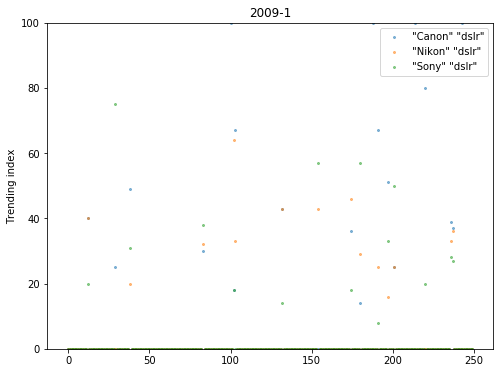

2009-1: DONE


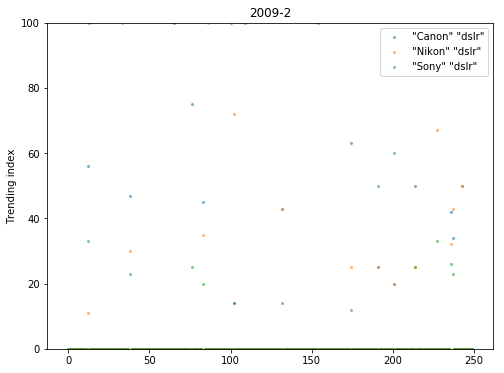

2009-2: DONE


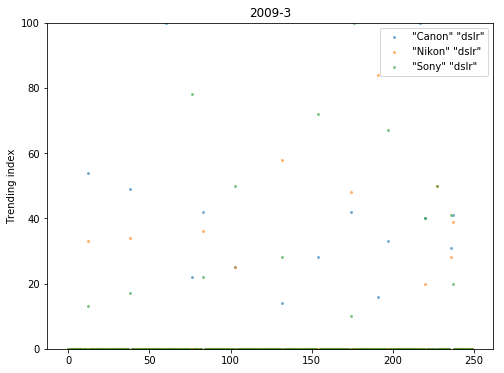

2009-3: DONE


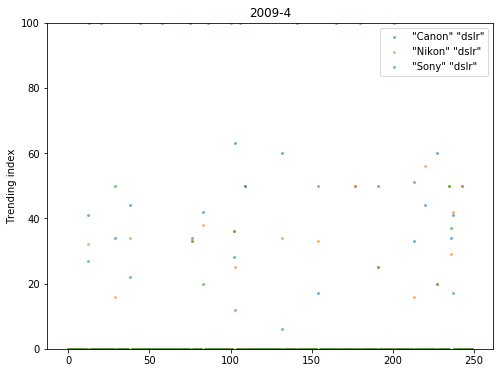

2009-4: DONE


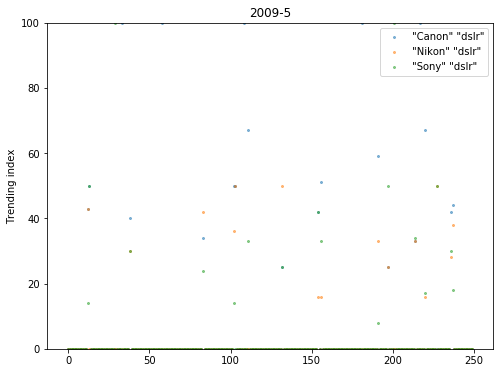

2009-5: DONE


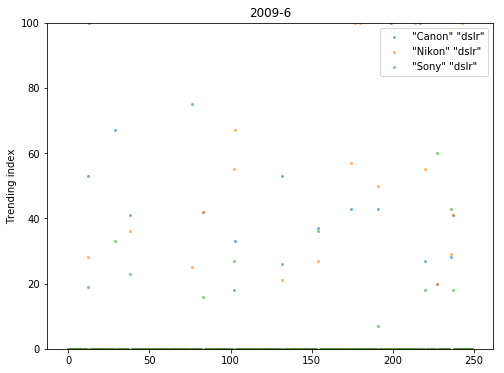

2009-6: DONE


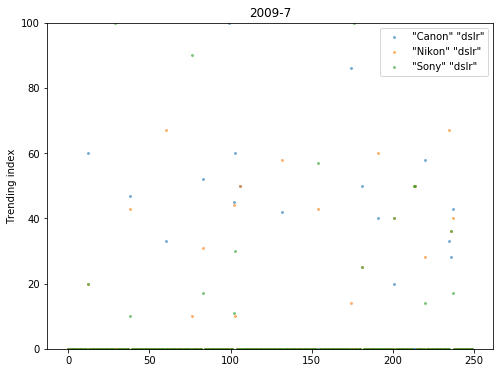

2009-7: DONE


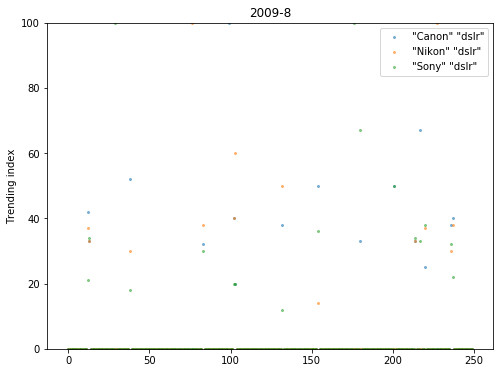

2009-8: DONE


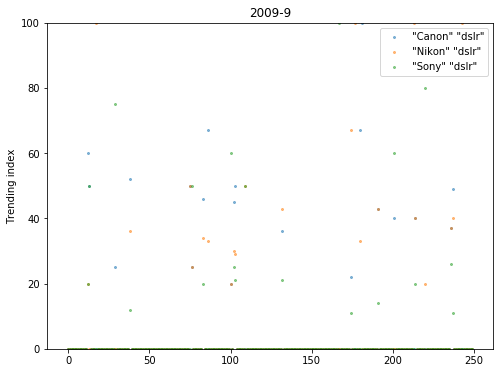

2009-9: DONE


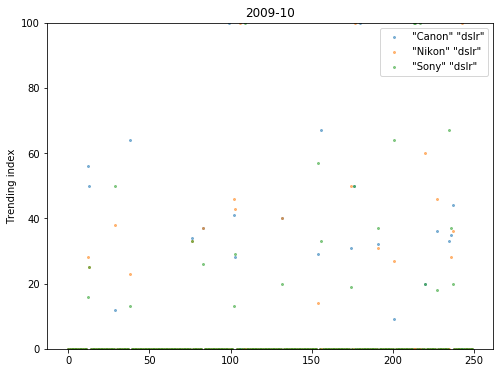

2009-10: DONE


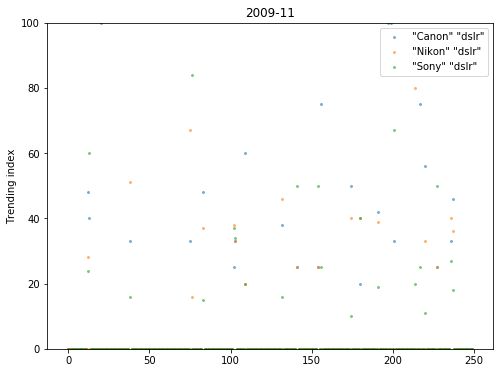

2009-11: DONE


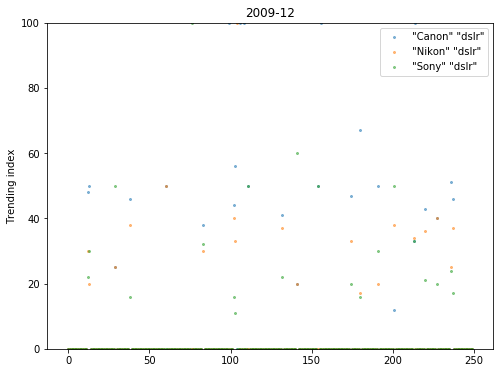

2009-12: DONE


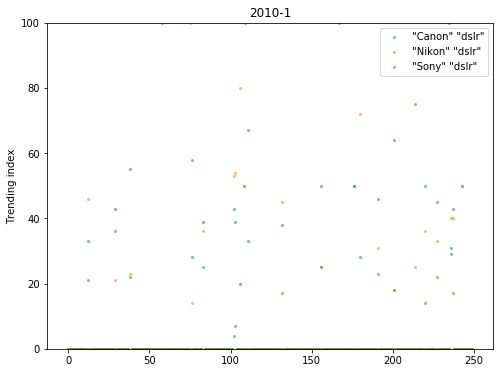

2010-1: DONE


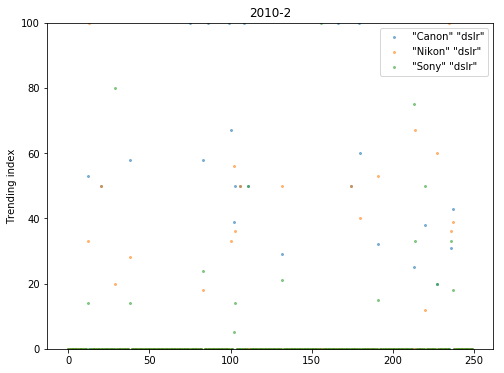

2010-2: DONE


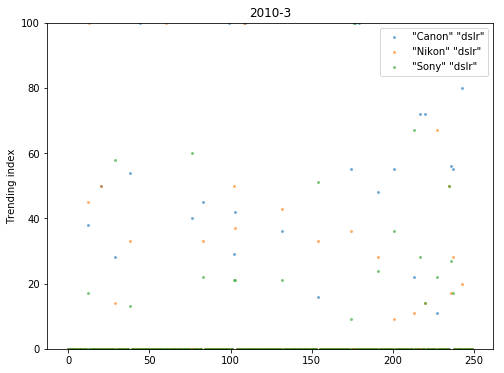

2010-3: DONE


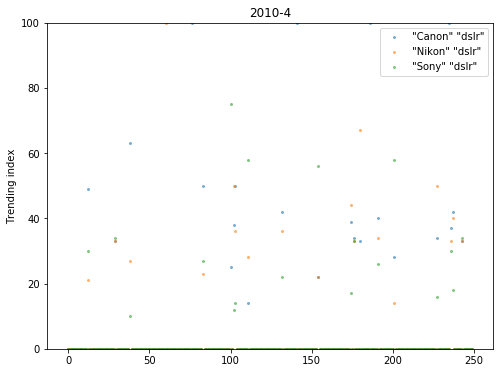

2010-4: DONE


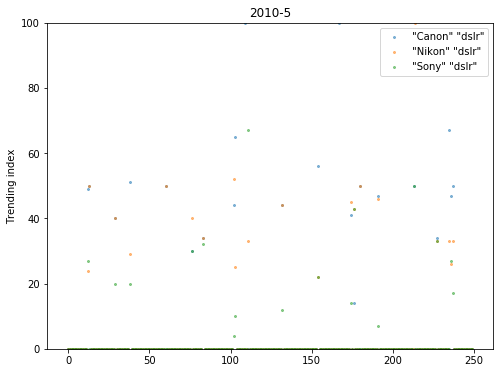

2010-5: DONE


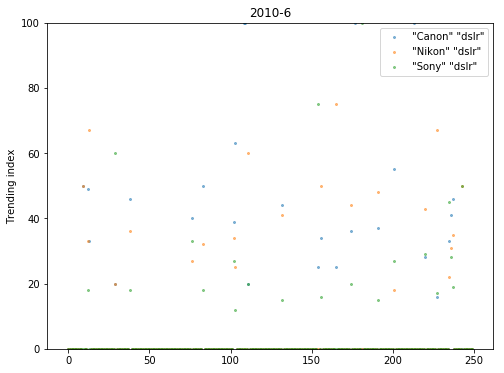

2010-6: DONE


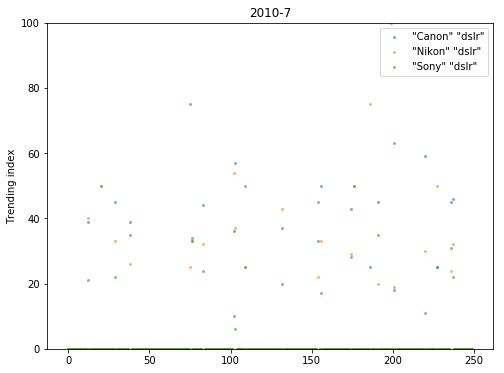

2010-7: DONE


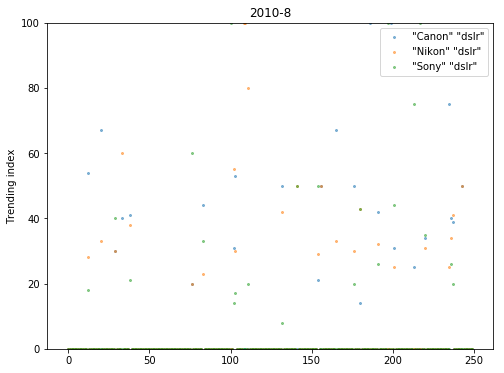

2010-8: DONE


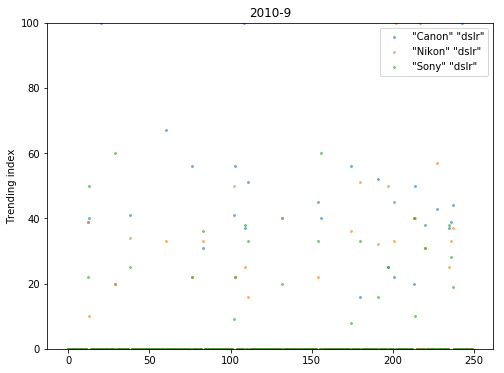

2010-9: DONE


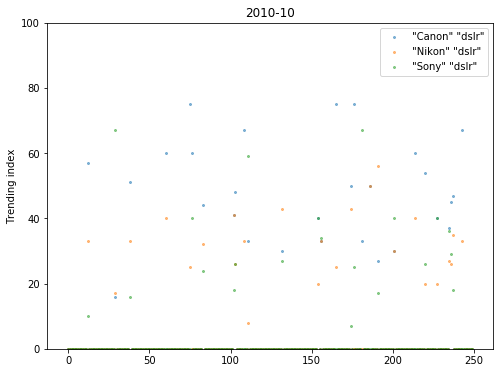

2010-10: DONE


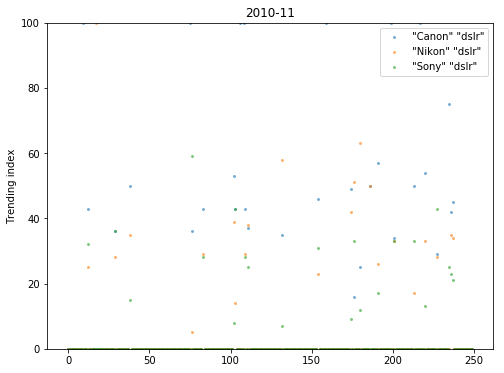

2010-11: DONE


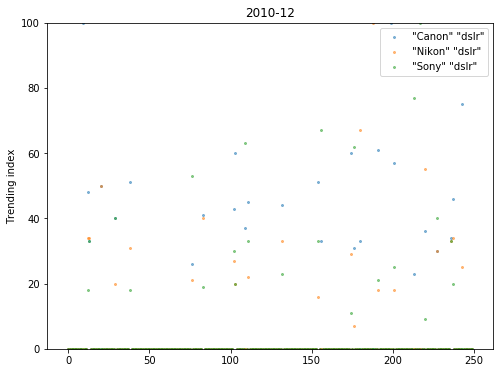

2010-12: DONE


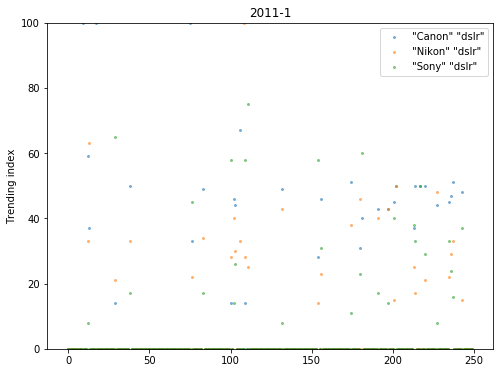

2011-1: DONE


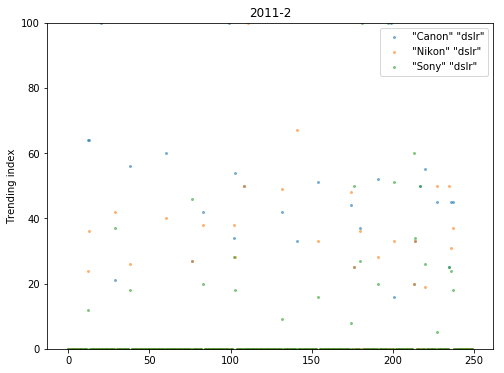

2011-2: DONE


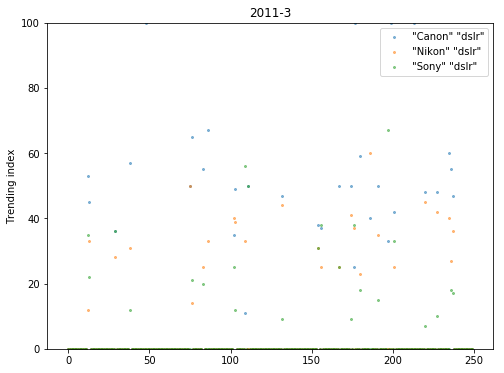

2011-3: DONE


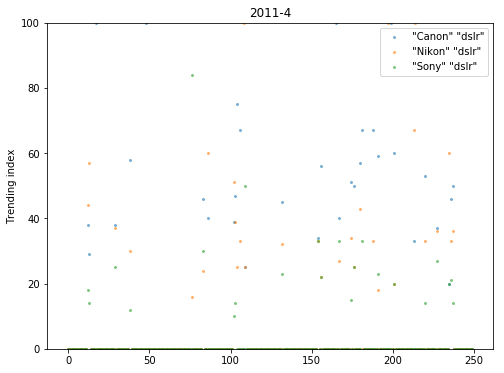

2011-4: DONE


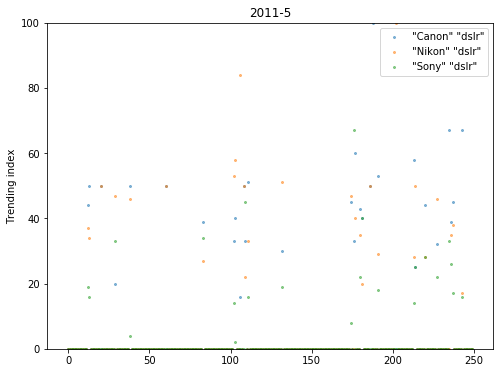

2011-5: DONE


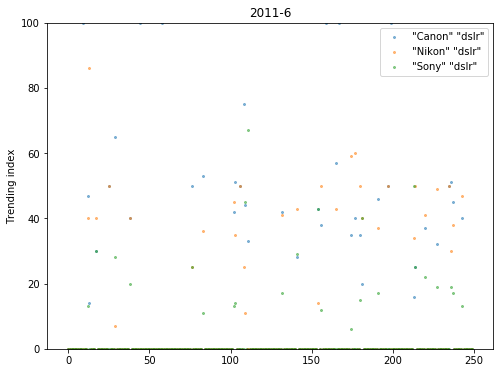

2011-6: DONE


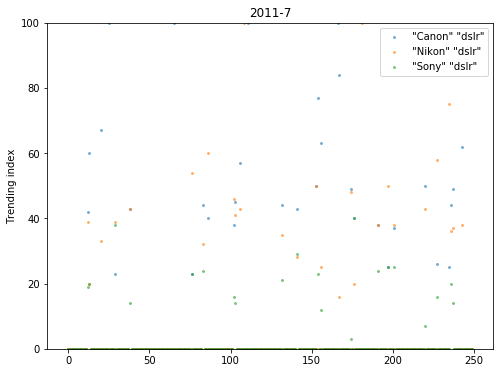

2011-7: DONE


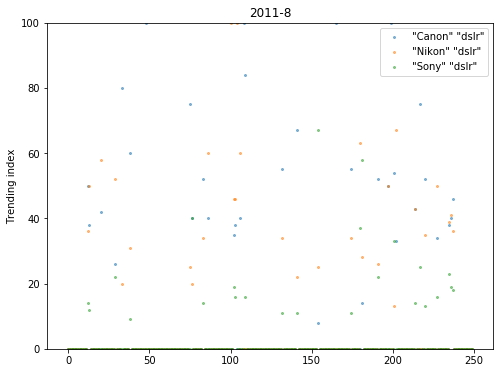

2011-8: DONE


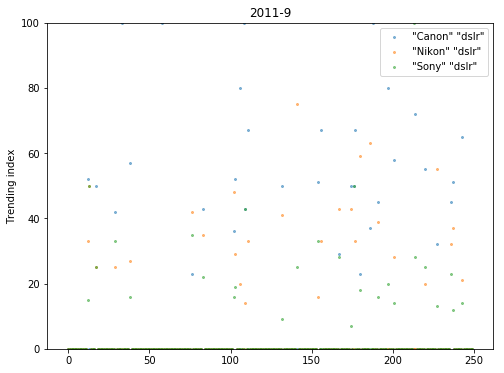

2011-9: DONE


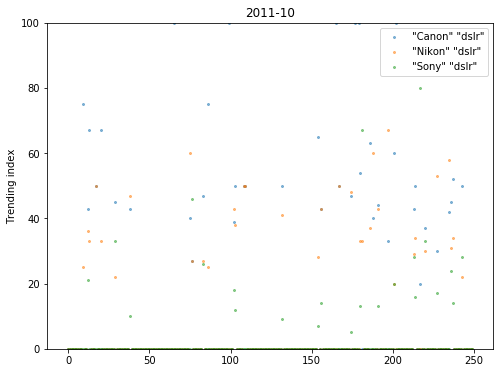

2011-10: DONE


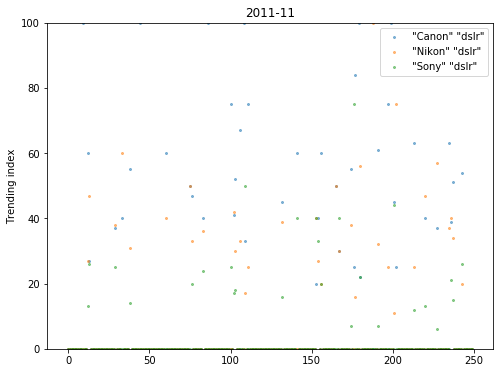

2011-11: DONE


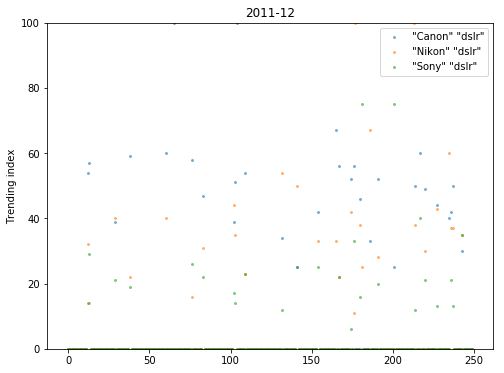

2011-12: DONE


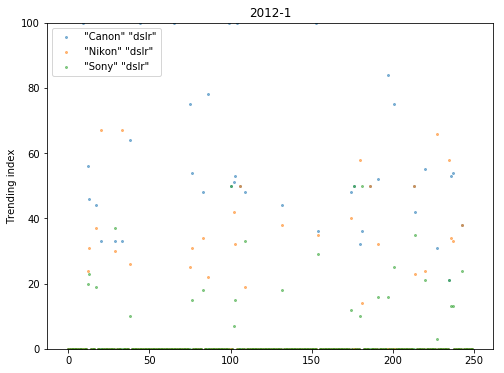

2012-1: DONE


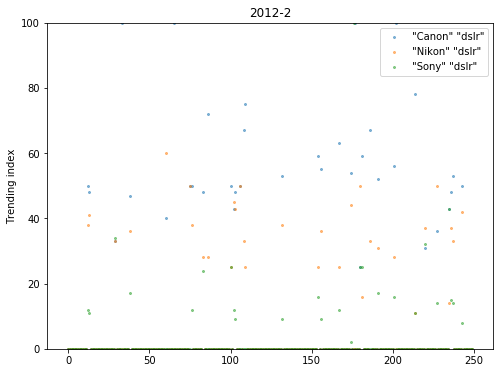

2012-2: DONE


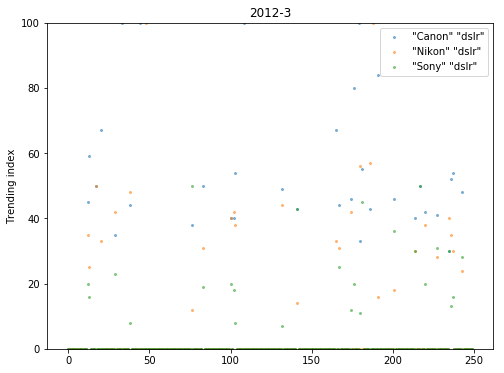

2012-3: DONE


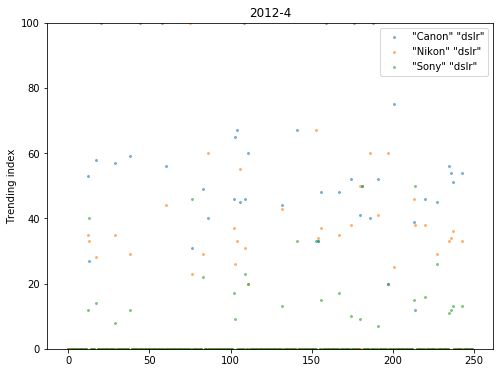

2012-4: DONE


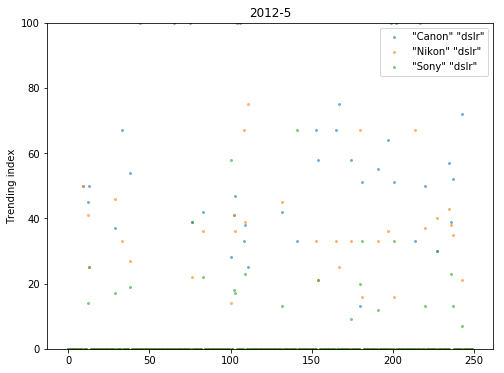

2012-5: DONE


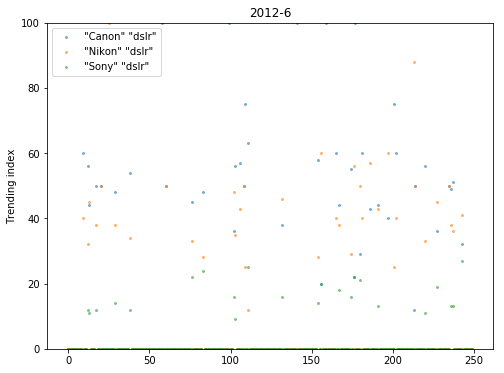

2012-6: DONE


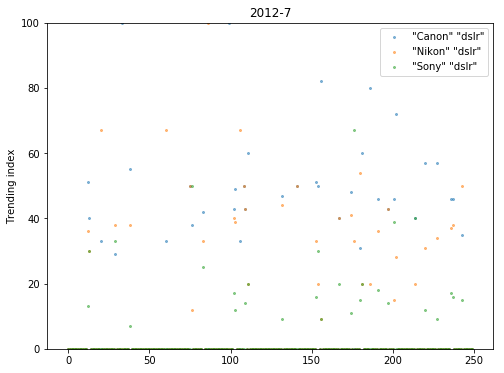

2012-7: DONE


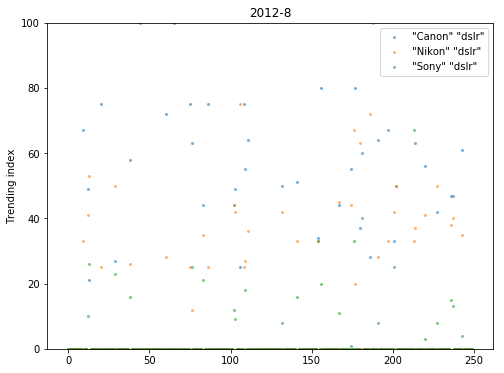

2012-8: DONE


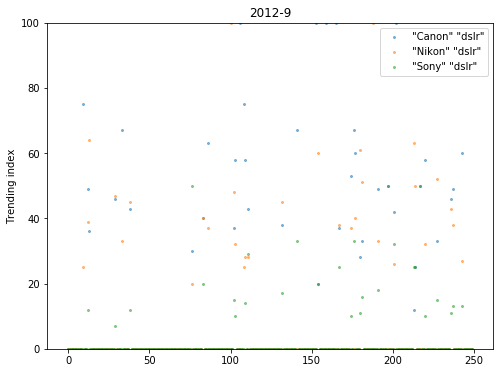

2012-9: DONE


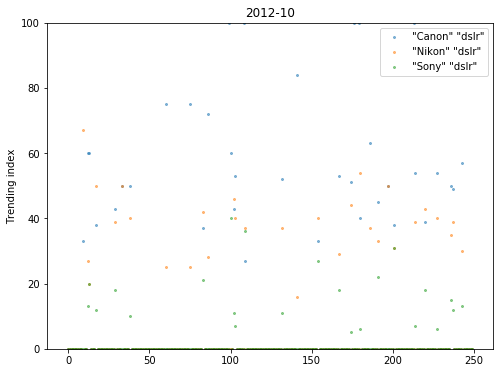

2012-10: DONE


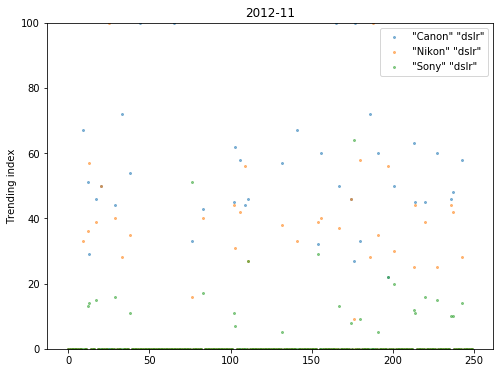

2012-11: DONE


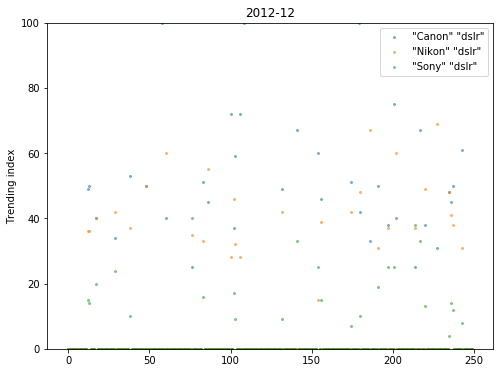

2012-12: DONE


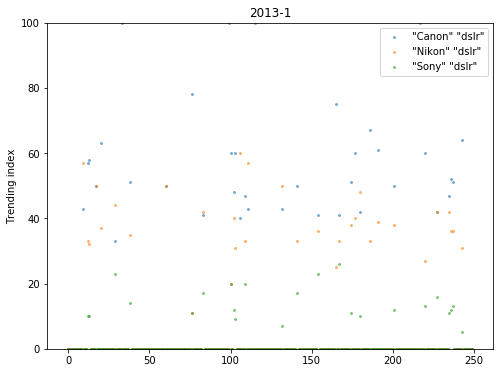

2013-1: DONE


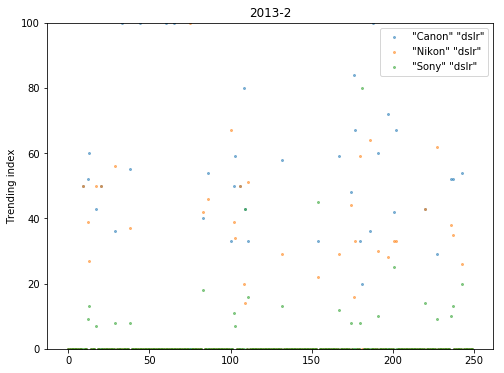

2013-2: DONE


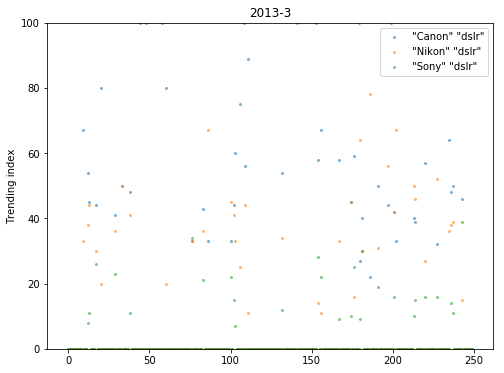

2013-3: DONE


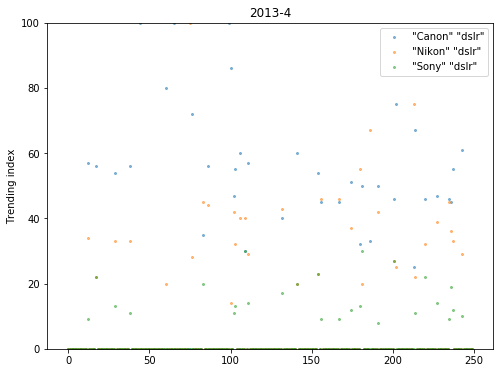

2013-4: DONE


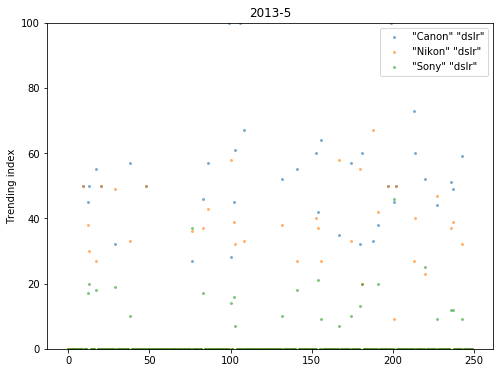

2013-5: DONE


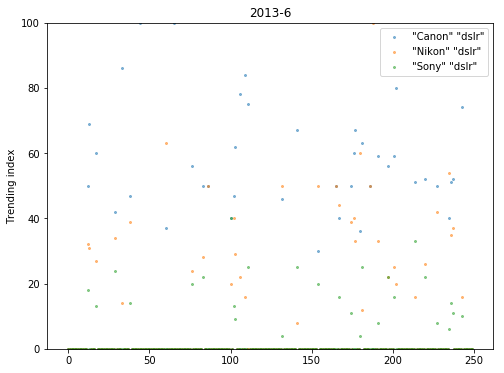

2013-6: DONE


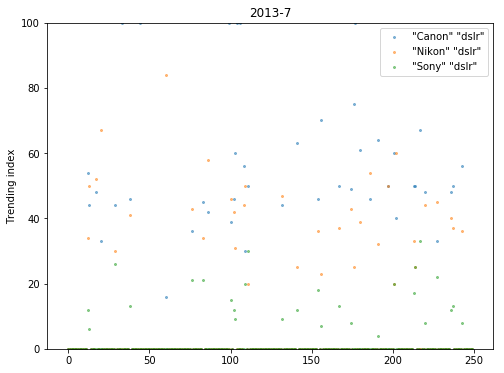

2013-7: DONE


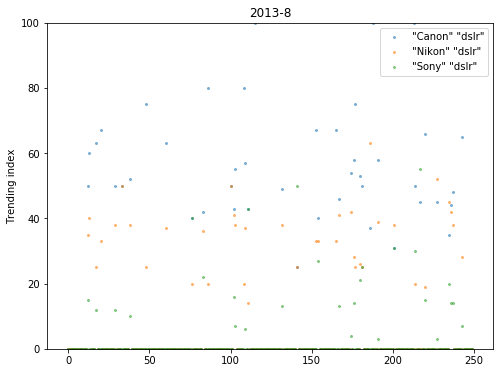

2013-8: DONE


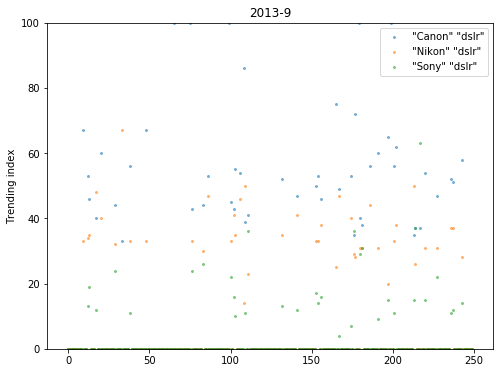

2013-9: DONE


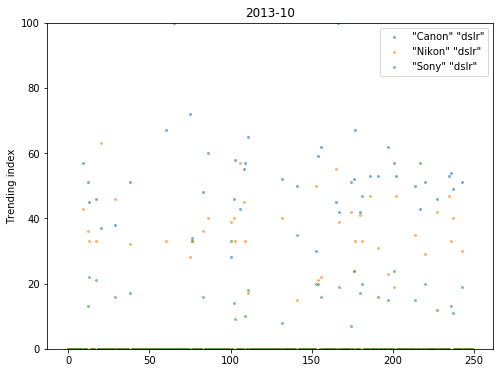

2013-10: DONE


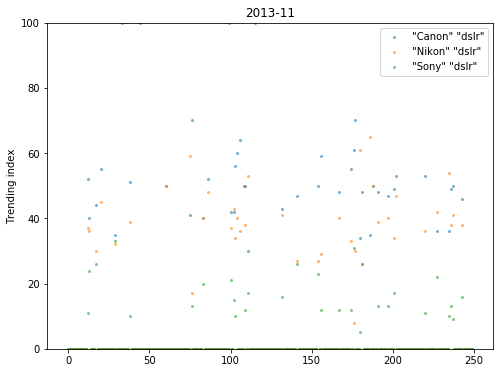

2013-11: DONE


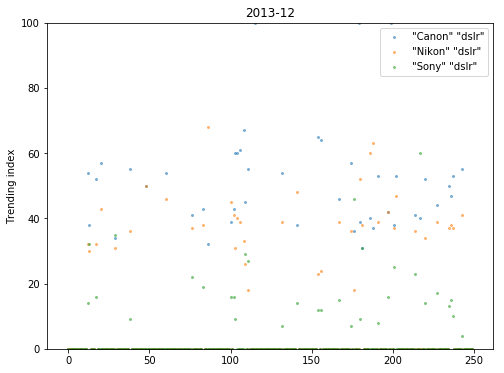

2013-12: DONE


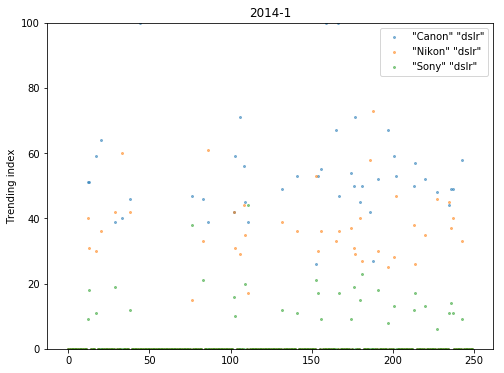

2014-1: DONE


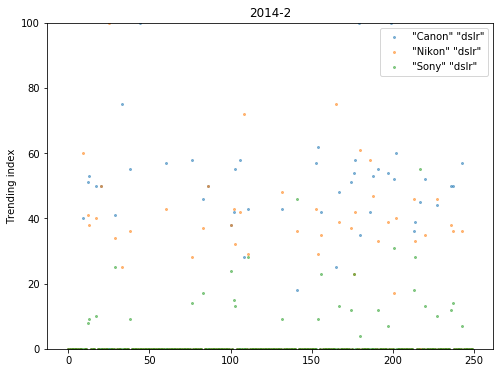

2014-2: DONE


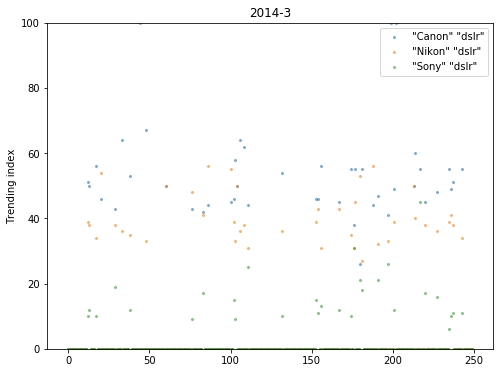

2014-3: DONE


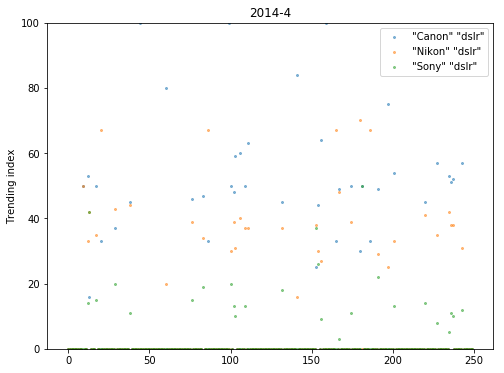

2014-4: DONE


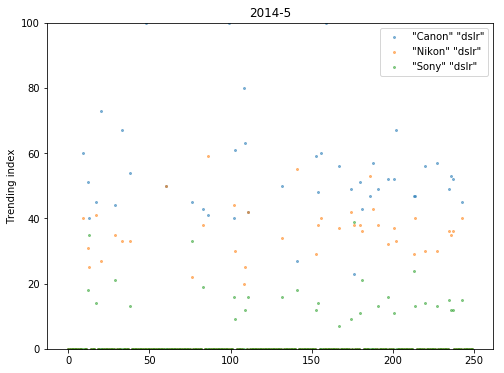

2014-5: DONE


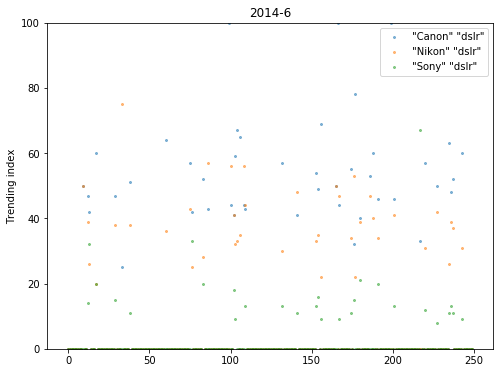

2014-6: DONE


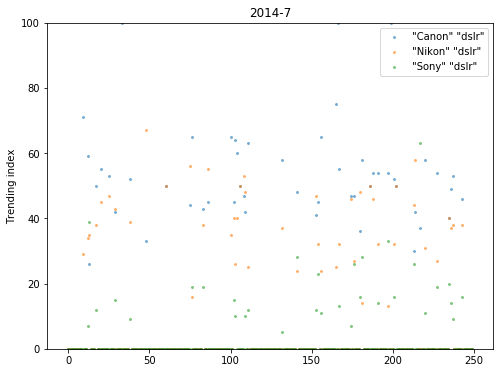

2014-7: DONE


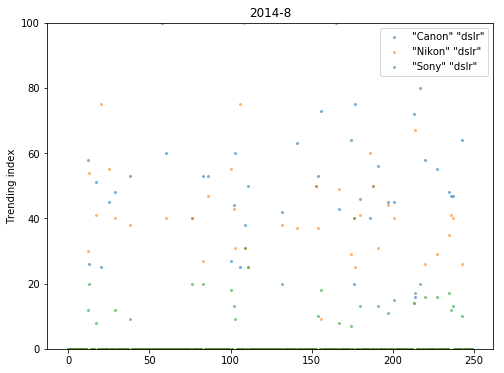

2014-8: DONE


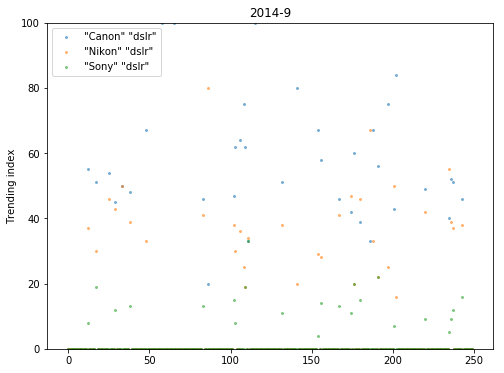

2014-9: DONE


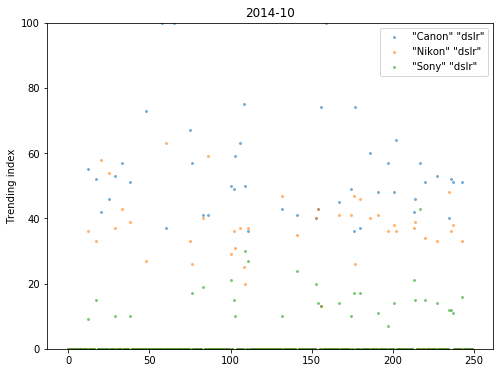

2014-10: DONE


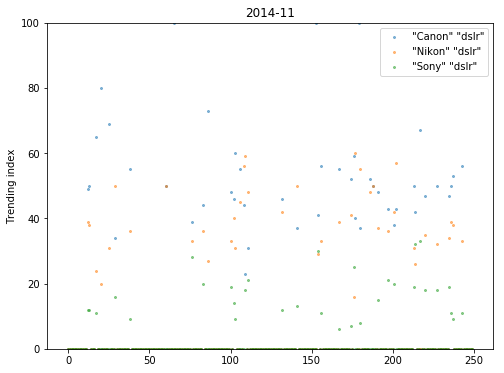

2014-11: DONE


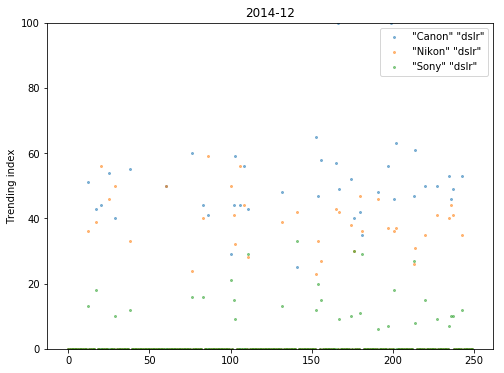

2014-12: DONE


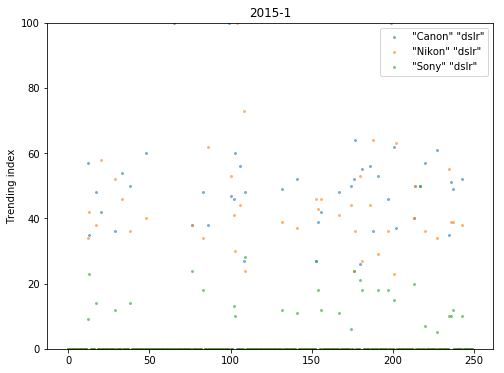

2015-1: DONE


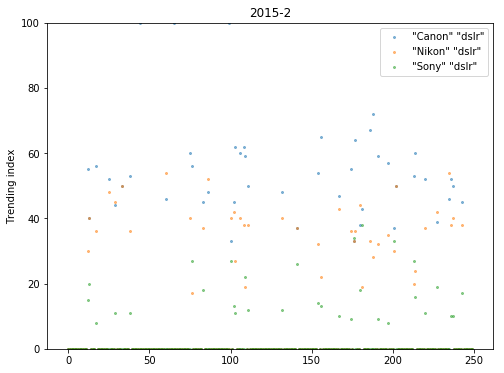

2015-2: DONE


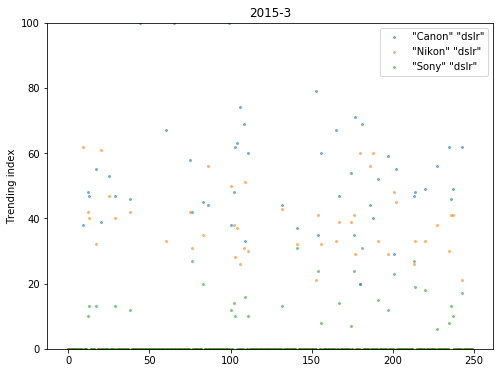

2015-3: DONE


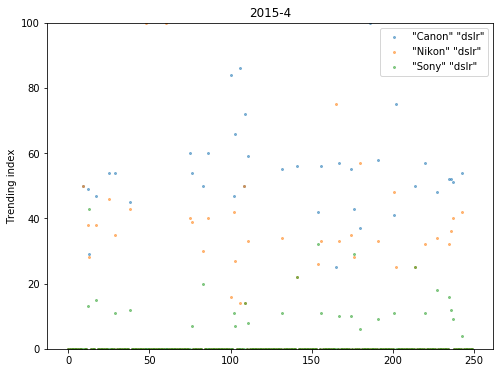

2015-4: DONE


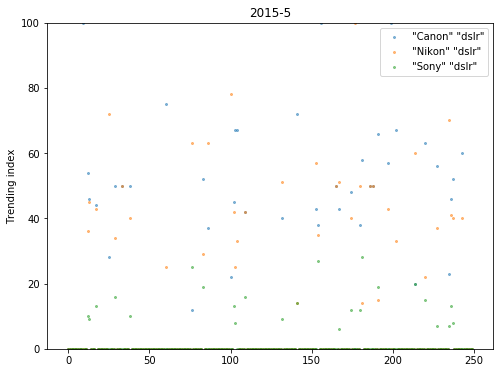

2015-5: DONE


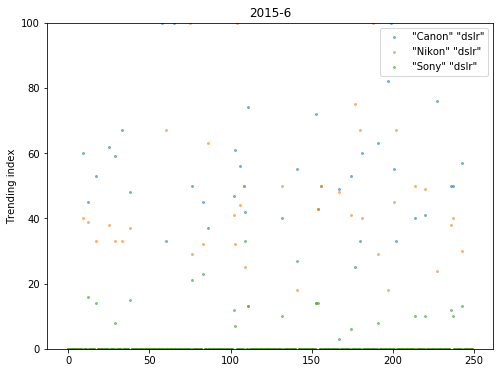

2015-6: DONE


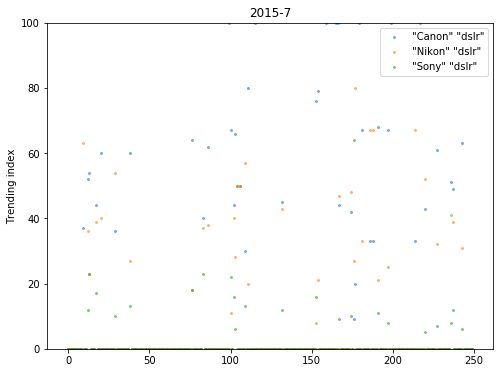

2015-7: DONE


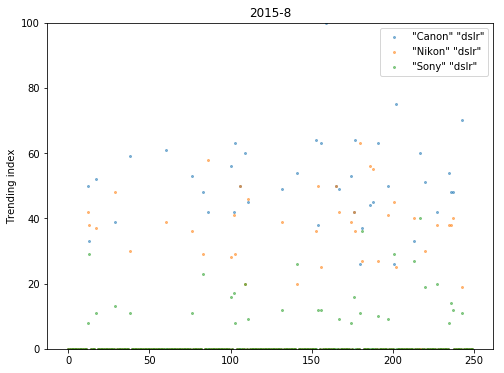

2015-8: DONE


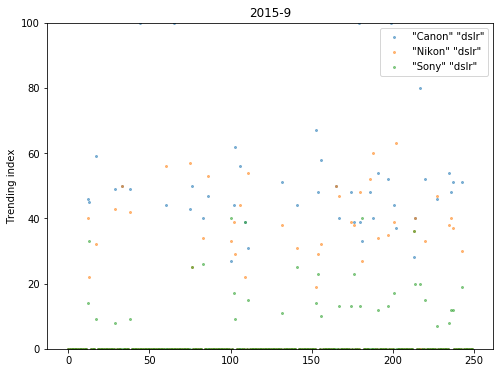

2015-9: DONE


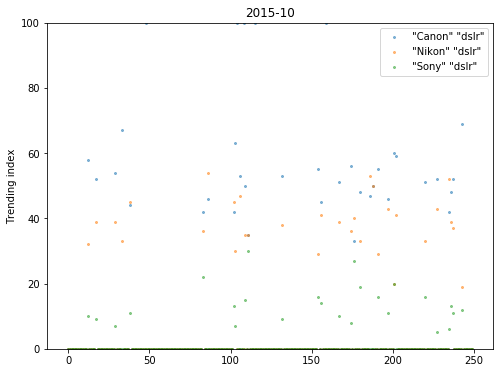

2015-10: DONE


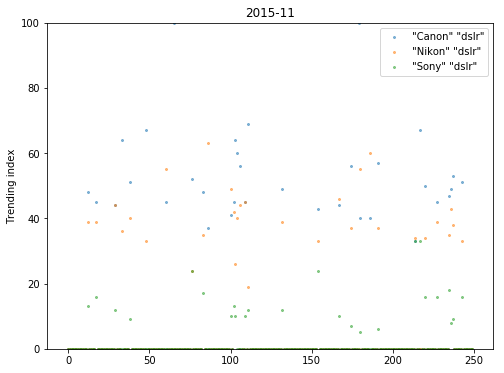

2015-11: DONE


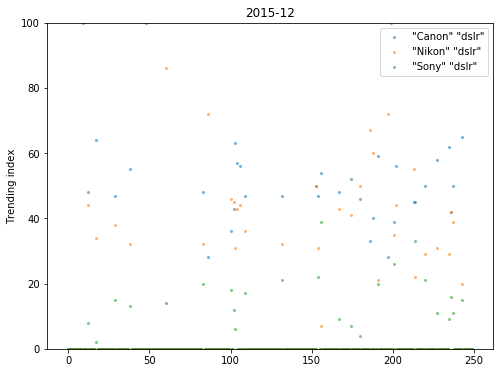

2015-12: DONE


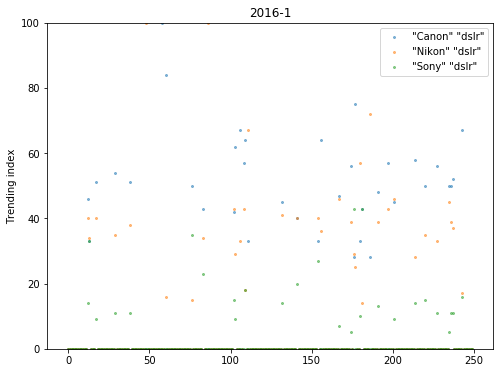

2016-1: DONE


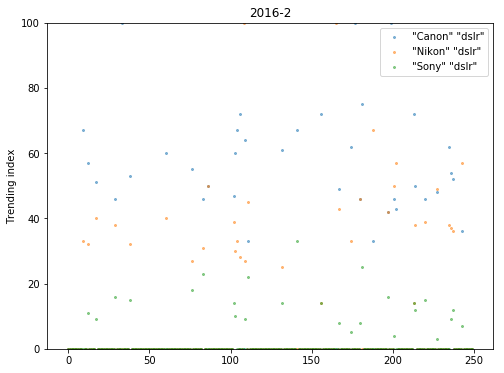

2016-2: DONE


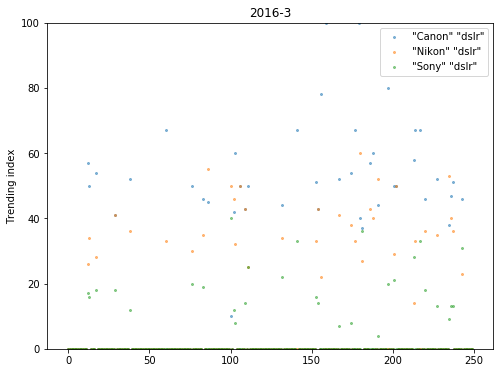

2016-3: DONE


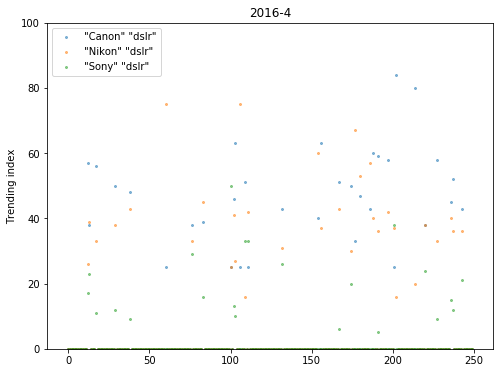

2016-4: DONE


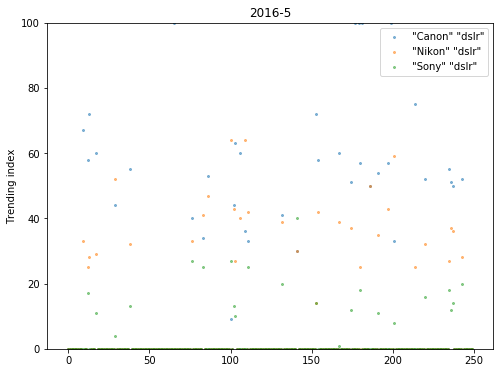

2016-5: DONE


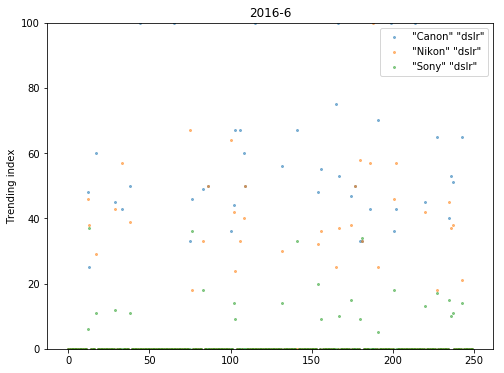

2016-6: DONE


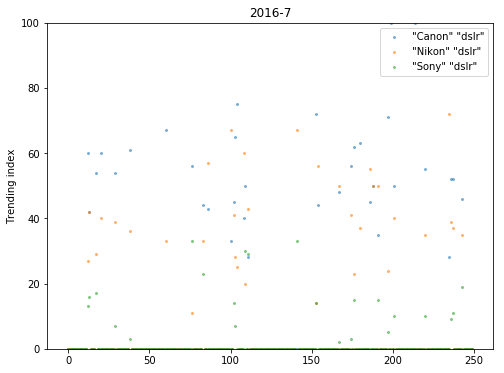

2016-7: DONE


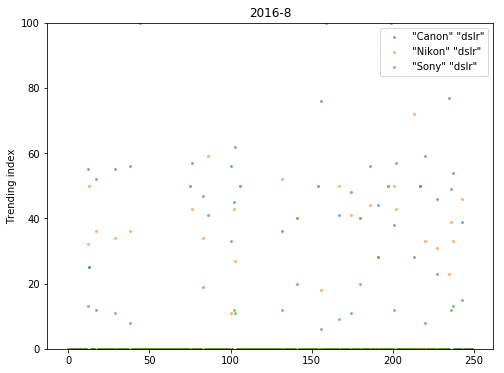

2016-8: DONE


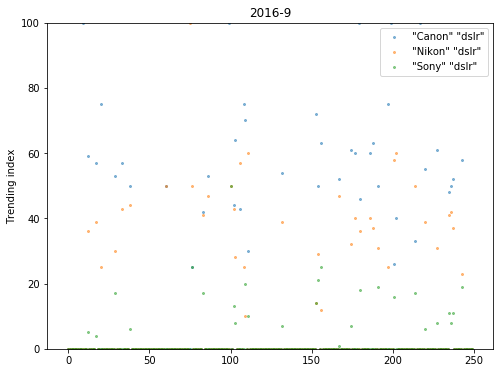

2016-9: DONE


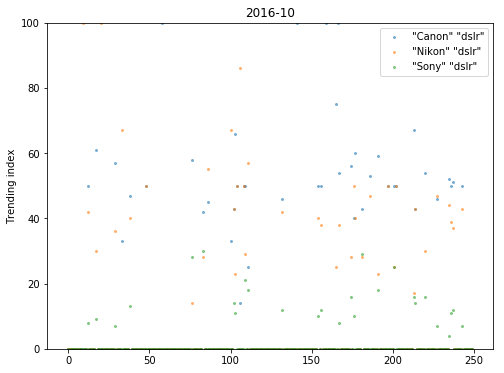

2016-10: DONE


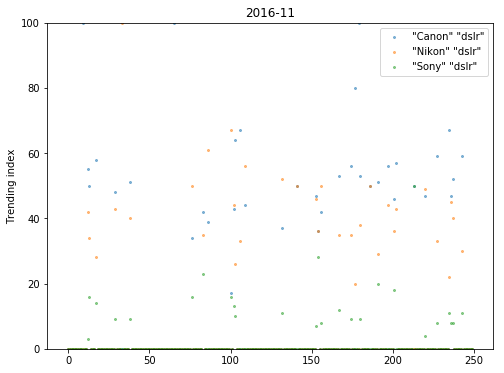

2016-11: DONE


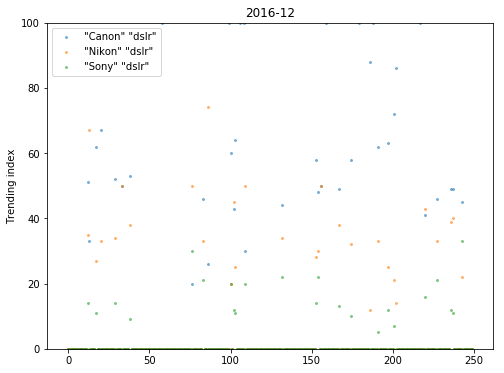

2016-12: DONE


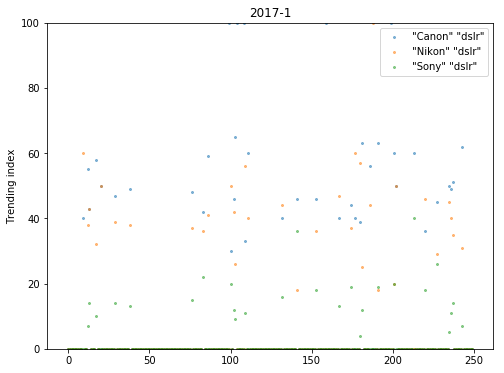

2017-1: DONE


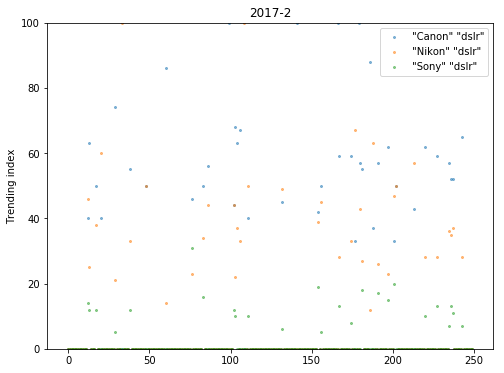

2017-2: DONE


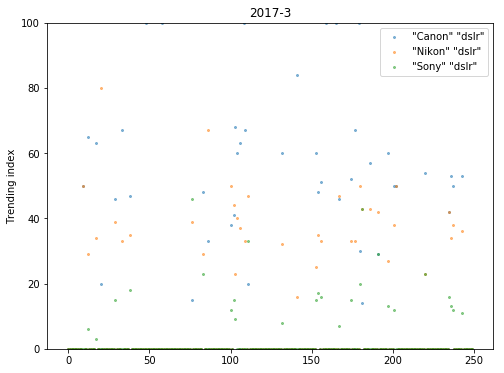

2017-3: DONE


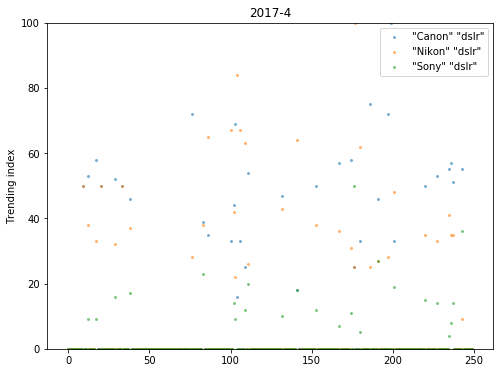

2017-4: DONE


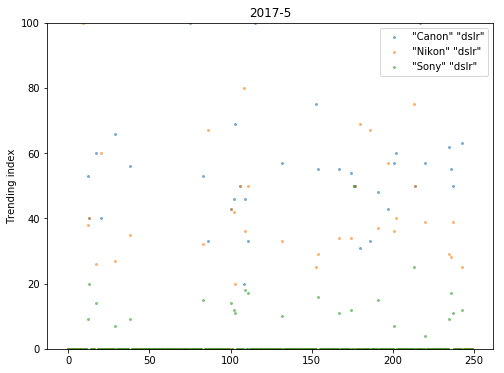

2017-5: DONE


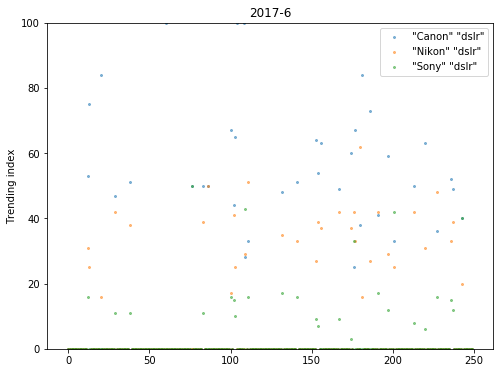

2017-6: DONE


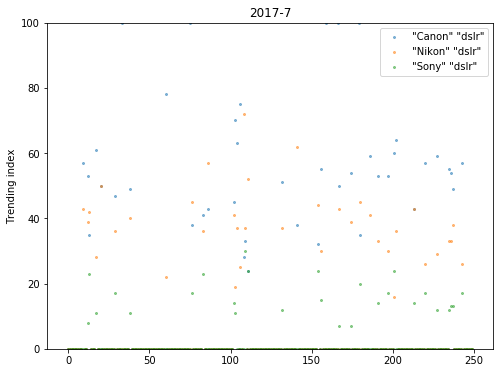

2017-7: DONE


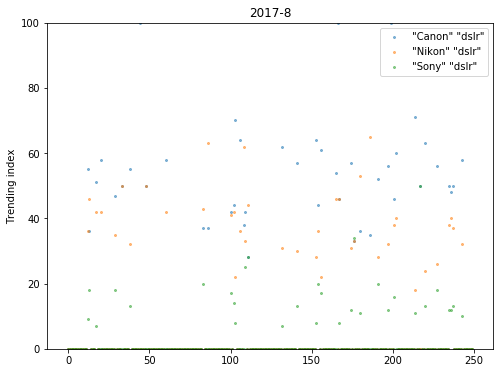

2017-8: DONE


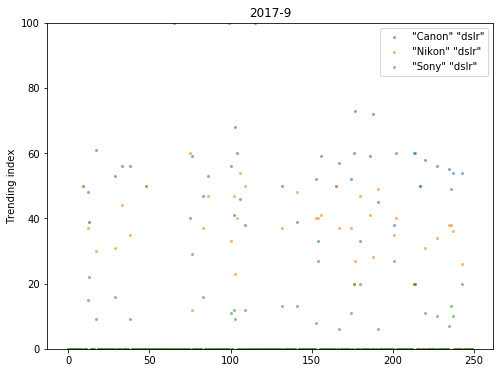

2017-9: DONE


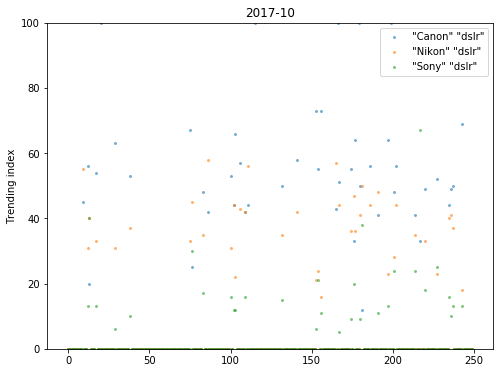

2017-10: DONE


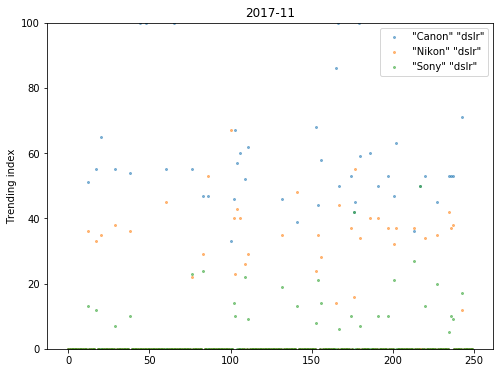

2017-11: DONE


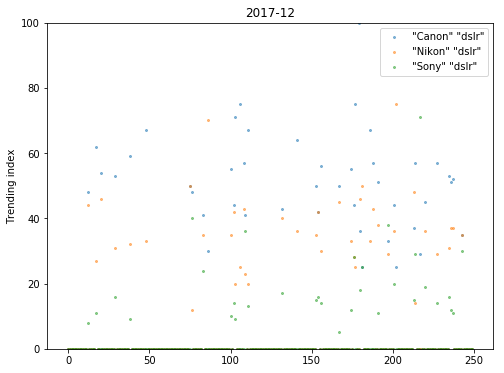

2017-12: DONE


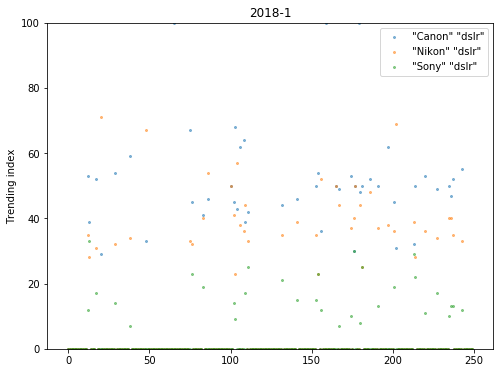

2018-1: DONE


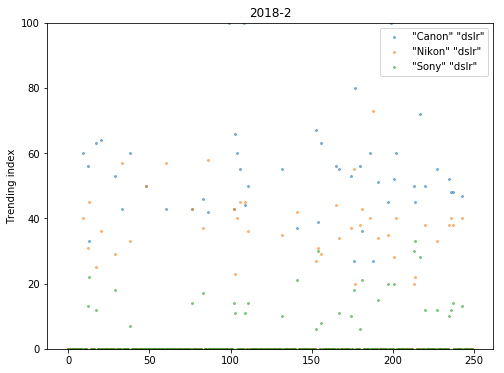

2018-2: DONE


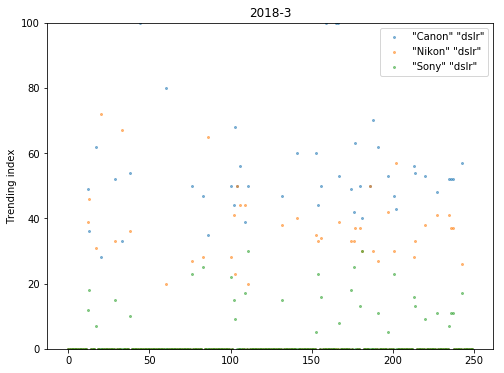

2018-3: DONE


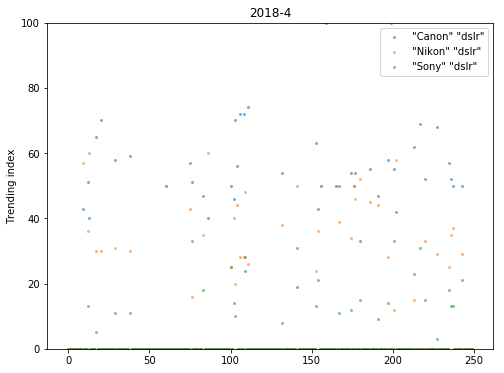

2018-4: DONE


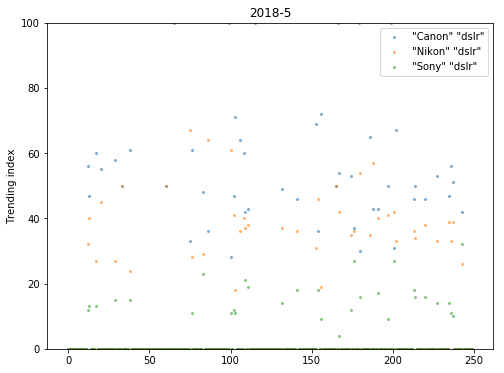

2018-5: DONE


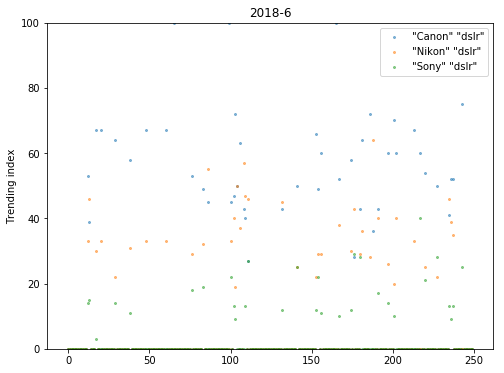

2018-6: DONE


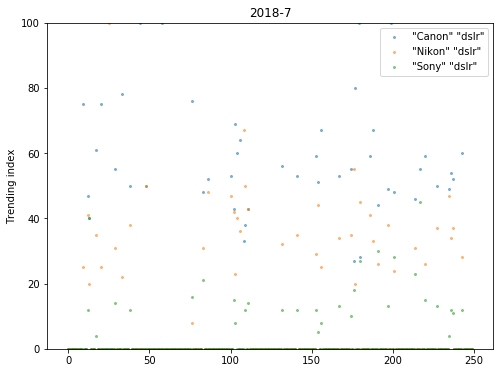

2018-7: DONE


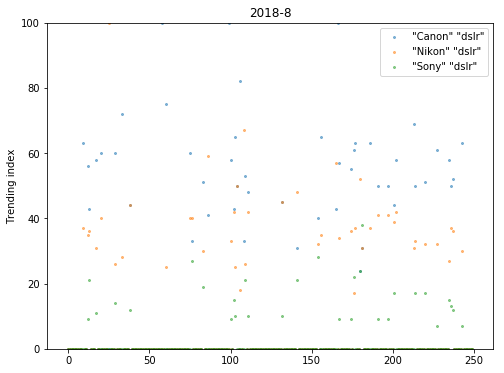

2018-8: DONE


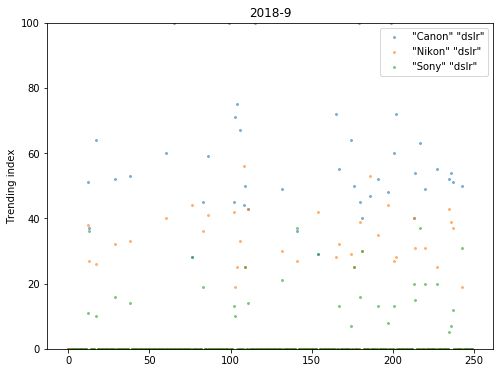

2018-9: DONE


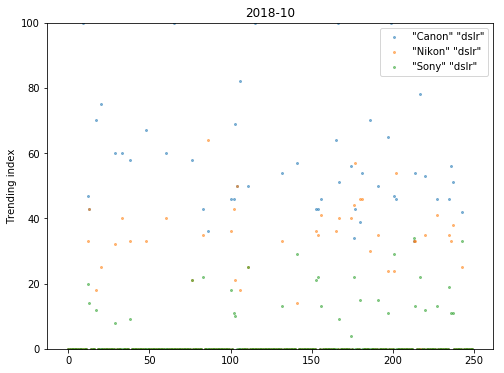

2018-10: DONE


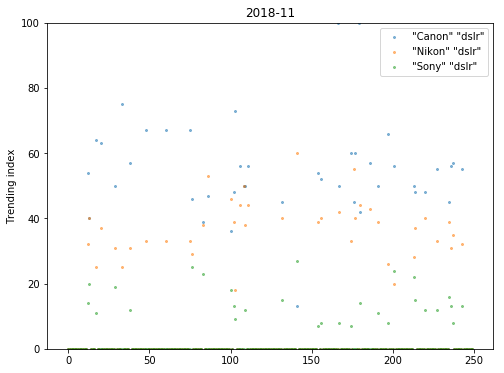

2018-11: DONE


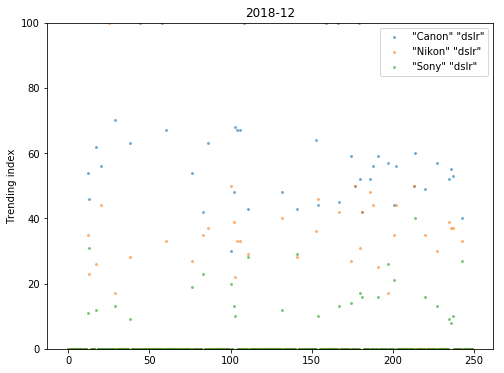

2018-12: DONE


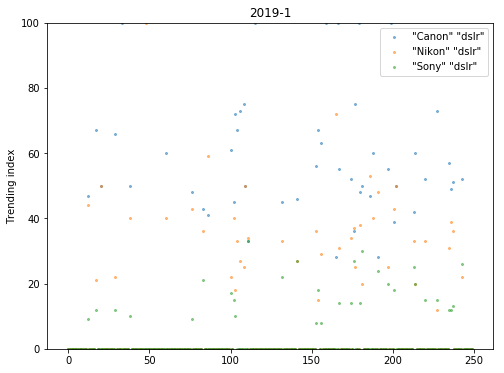

2019-1: DONE


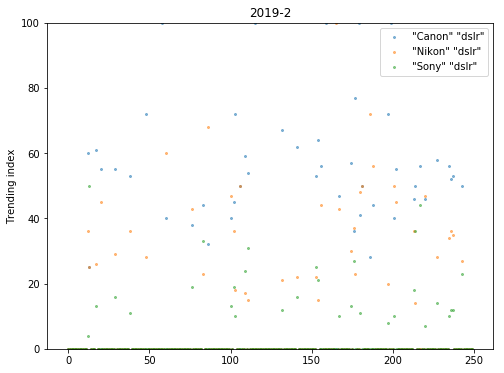

2019-2: DONE


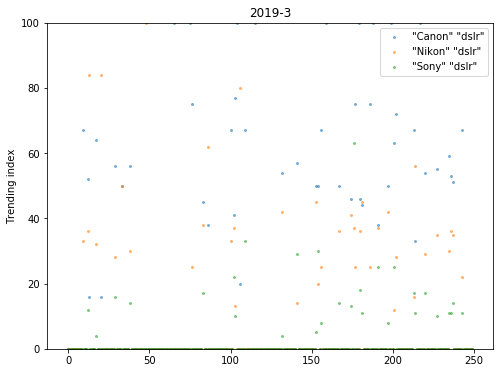

2019-3: DONE


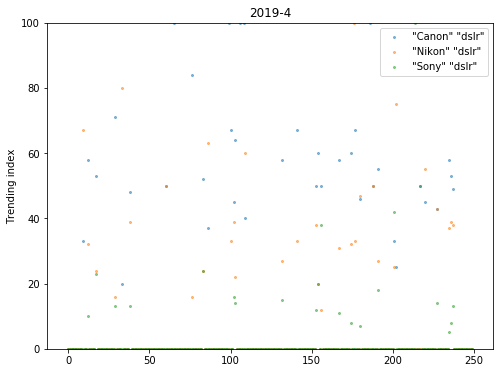

2019-4: DONE


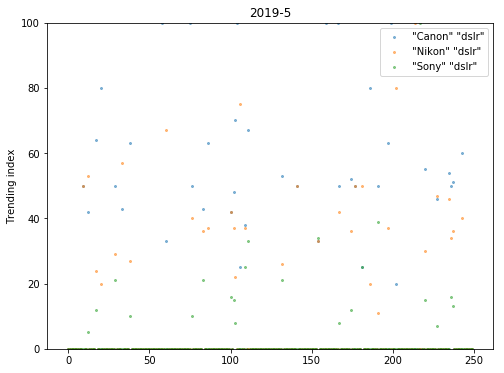

2019-5: DONE


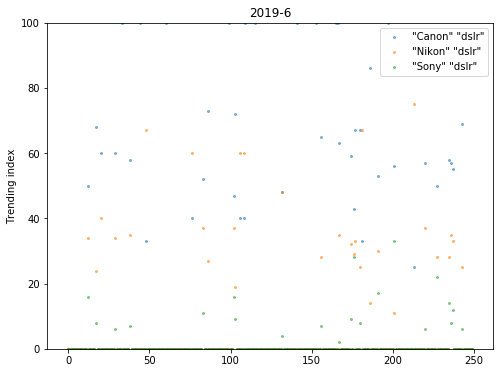

2019-6: DONE


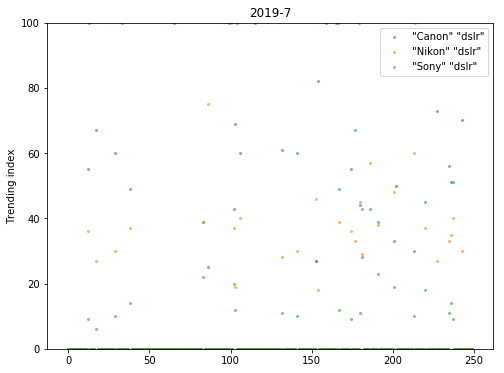

2019-7: DONE


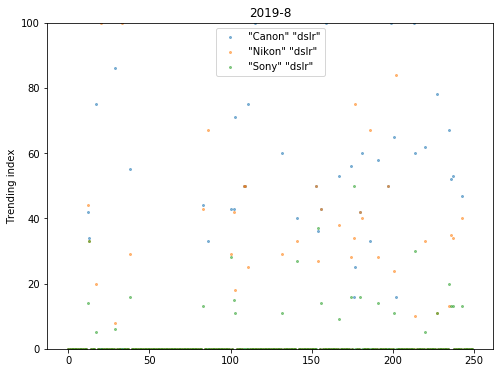

2019-8: DONE


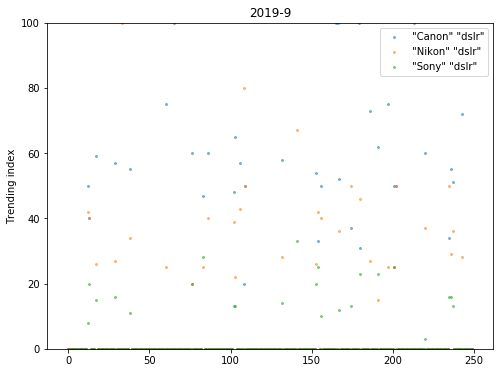

2019-9: DONE


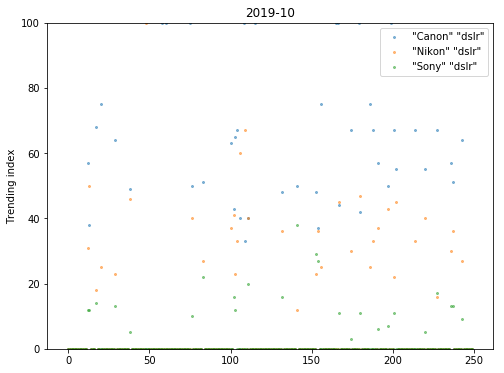

2019-10: DONE


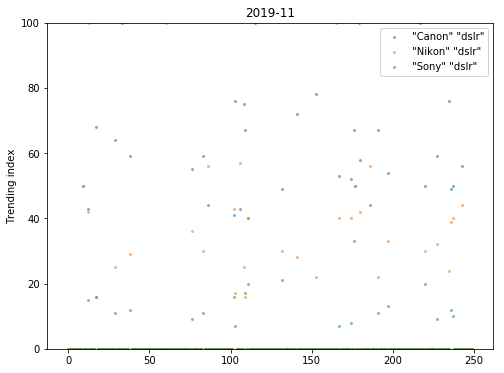

2019-11: DONE


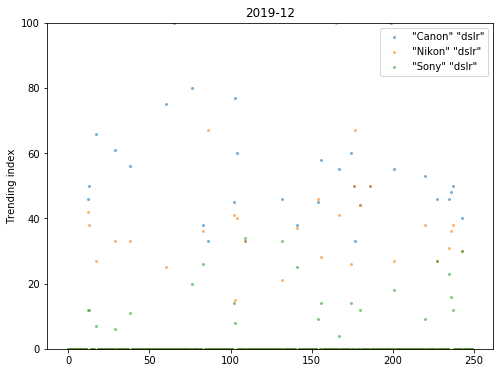

2019-12: DONE


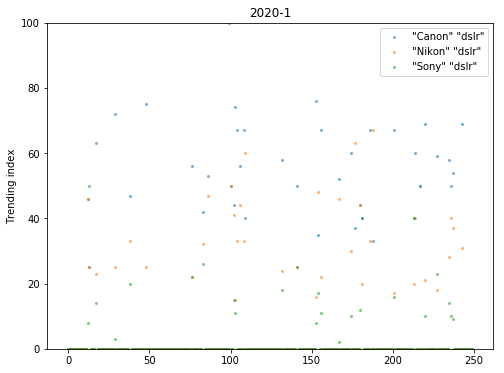

2020-1: DONE


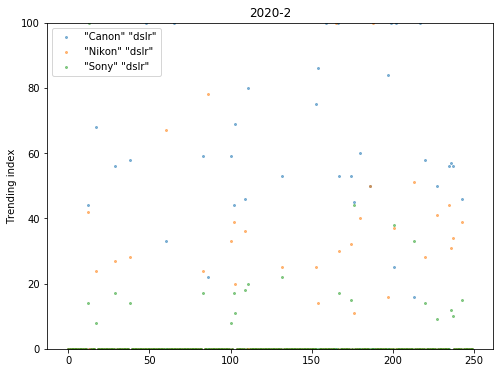

2020-2: DONE


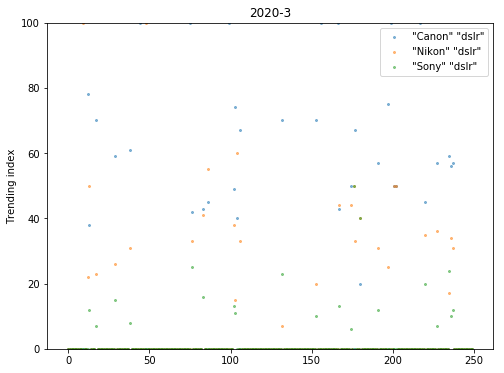

2020-3: DONE


In [3]:
for y in range(2006, 2021):
    for m in range(1, 13):
        if (y == 2020 and m>3):
            break
        while True:
            try:
                t = Trend(y, m, kw_list)
                t.scrape()
                t.toPickle('dslr', 'data/raw/dslr')
                t.scatter()
                print(str(y) + '-' + str(m) + ': DONE')
                time.sleep(0.1)  # in seconds
                break
            except:
                print("Error caught. Going to pause for some duration...")
                time.sleep(60)